# Machine Learning 101 - @lgmoneda
## Least Mean Squares Regression in Python


Since i've been through some basic Machine Learning along a "Computer Intelligence" course, i decided to share my assignments, after adding some theory chunks. I hope you enjoy.

First, a short introduction and historical view about LMS from Wikipedia:

"<b>Least mean squares (LMS)</b> algorithms are a class of <a href="/wiki/Adaptive_filter" title="Adaptive filter">adaptive filter</a> used to mimic a desired filter by finding the filter coefficients that relate to producing the least mean squares of the error signal (difference between the desired and the actual signal). It is a <a href="/wiki/Stochastic_gradient_descent" title="Stochastic gradient descent">stochastic gradient descent</a> method in that the filter is only adapted based on the error at the current time. It was invented in 1960 by <a href="/wiki/Stanford_University" title="Stanford University">Stanford University</a> professor <a href="/wiki/Bernard_Widrow" title="Bernard Widrow">Bernard Widrow</a> and his first Ph.D. student, <a href="/wiki/Ted_Hoff" title="Ted Hoff" class="mw-redirect">Ted Hoff</a>."



## Building the Model ## 

"Neural and Adaptive Systems: Fundamentals through Simulations
by José C. Principe (Author), Neil R. Euliano (Author), W. Curt Lefebvre (Author)" 

Faça um programa de computador (Matlab ou C) que implemente o algoritmo LMS. Considere o caso geral de dimensão D do vetor de entrada e N amostras de treinamento. Incluir o viés (bias) b como um dos coeficientes (ou pesos) da regressão linear. Faça previsão para plotar curvas de aprendizagem (J vs k) e de evolução do valor dos pesos (w vs k).


Error:
<img src="error.png">

Cost


In [1]:
#We want to print out our plots in the stream
%matplotlib inline

import numpy as np
#For our plots
import matplotlib.pyplot as plt
#For the 3d plots
from mpl_toolkits.mplot3d import Axes3D

In [30]:
class LMS_Regressor:
     
    def __init__(self):
        self.weights = None
    
    def errors(self, x, target, weights):
        return target - np.dot(x, weights)

    def cost(self, x, target, weights):
        return (1.0/(2*len(target)))*sum(self.errors(x, target, weights) * self.errors(x, target, weights))
    
    def fit(self, x, target, weights, step_sizes=[0.01], intercept = True, plots = False, max_iterations=1000):
        #if we choose intercept, then we add a 1s column to the data
        if intercept:
            intercept_x = np.ones((x.shape[0], 1))
            x = np.concatenate((intercept_x, x), axis = 1)
        #call the gradient descent to estimate the weights that make our model fit to the data
        self.weights = self.gradient_descent(x, target, step_sizes, plots, max_iterations)
        return self
                        
    def predict_output(self, feature_matrix, weights):
        predictions = np.dot(feature_matrix, weights)
        return(predictions)
    
    def gradient_descent(self, feature_matrix, output, step_sizes, plots, max_iterations):
        weights = np.zeros((feature_matrix.shape[1], 1))
        #We build two lists with the max_iterations as length, so we can plot them later
        plot_weights = [[0 for x in range(max_iterations)] for x in range(len(weights))] 
        plot_costs = [[0 for x in range(max_iterations)] for x in range(len(step_sizes))]
        
        for j in range(len(step_sizes)):
            iterations = 0
            weights = np.zeros((feature_matrix.shape[1], 1))
            while iterations < max_iterations:      
                plot_costs[j][iterations] = float(self.cost(feature_matrix, output, weights))
                preds = self.predict_output(feature_matrix, weights)
                errors = self.errors(feature_matrix, output, weights)
                for i in xrange(len(weights)): # loop over each weight
                    derivative = -np.dot(errors.transpose(), feature_matrix[:, i])
                    weights[i] = weights[i] - derivative*step_sizes[j]
                    plot_weights[i][iterations] = float(weights[i])
                iterations += 1
        if plots:
            self.plots(weights, plot_weights, plot_costs, max_iterations, step_sizes)
        return weights
    
    def plots(self, weights, plot_weights, plot_costs, max_iterations, step_sizes):
        for i in range(len(weights)):
                plt.title("w" + str(i) + " x Iterations")
                plt.ylabel("w" + str(i))
                plt.xlabel("Iteration k")
                plt.plot(plot_weights[i])
                plt.show()
        plt.figure(figsize=(12,10))
        plt.title("Learning Curves")
        plt.xlabel("Iteration k")
        plt.ylabel("Costs J")
        axis = np.arange(max_iterations)
        
        for j in range(len(step_sizes)):
            plt.plot(axis, plot_costs[j]) 
        plt.legend(step_sizes)
        plt.show()
        return plt

In [31]:
def plot_fitted_model(x, y, intercept, slope):
    plt.plot(x, x*slope + intercept)
    plt.scatter(x, y)
    plt.ylabel("y")
    plt.xlabel("x")
    plt.title("Fitted Model")
    plt.show()
    
def plot_fitted_model_3d(x, y, intercept, coefs):
    fig = plt.figure()
    plt3d = fig.add_subplot(111, projection='3d')
    plt3d.set_ylabel("X2")
    plt3d.set_xlabel("X1")
    plt3d.set_zlabel("D and D-hat")
    plt.title("Fitted Model")
    z = x[:, 0]*coefs[0] + x[:, 1]*coefs[1] + intercept
    xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))
    z = xx*coefs[0] + yy*coefs[1] + intercept
    plt3d.plot_surface(xx, yy, z, alpha=0.6)
    plt3d.scatter(x[:, 0], x[:, 1], y, color="red")
    plt.show()
    
def plot_fitted_model_3d2(x, y, intercept, coefs):
    fig = plt.figure(figsize=(12,10))
    plt3d = fig.add_subplot(111, projection='3d')
    plt.title("Fitted Model")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt3d.set_zlabel("D and D-hat")
    xx, yy = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-5, 5, 0.1))
    z = xx*coefs[0] + yy*coefs[1] + intercept
    plt3d.plot_surface(xx, yy, z, alpha=0.5, color="blue")
    plt3d.scatter(x[:, 0], x[:, 1], y, color="red", s=200)
    plt3d.view_init(elev=10., azim=65)
    plt.show()

## First Example ##
Aplique o programa acima para o caso:

X = {-0.5, -0.2, -0.1, 0.3, 0.4, 0.5, 0.7}
Y = {-1, 1, 2, 3.2, 3.5, 5, 6}

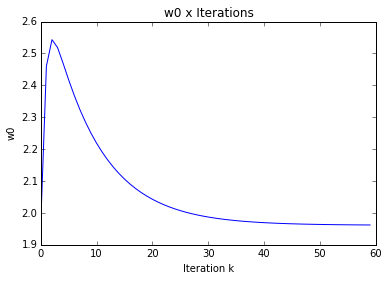

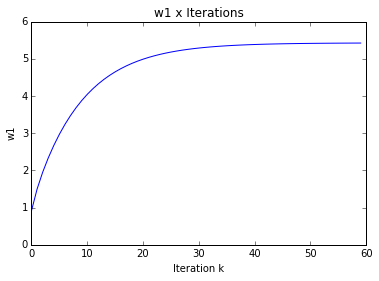

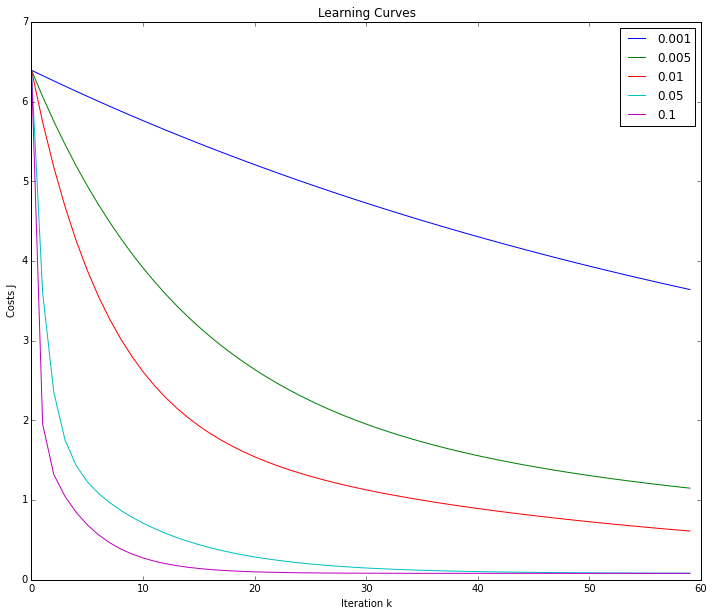

Final Weights: 
w0 = [ 1.96217622]
w1 = [ 5.42342574]


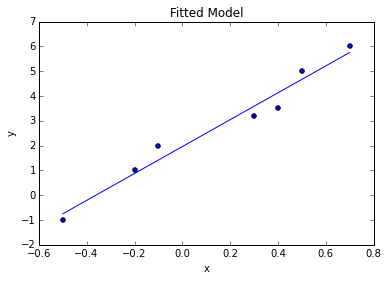

In [32]:
#We enter the data and put it on the right shape
X = np.array([[-0.5, -0.2, -0.1, 0.3, 0.4, 0.5, 0.7]])
X = X.reshape(7, 1)
y = np.array([[-1, 1, 2, 3.2, 3.5, 5, 6]])
y = y.reshape(7, 1)
#Setting the initial weights to zero
initial_weights = np.zeros((X.shape[1], 1))

#Creating the model
model = LMS_Regressor()
#Fitting the model to our data with an intercept, which is default
model = model.fit(X, y, initial_weights, [0.001, 0.005, 0.01, 0.05, 0.1], plots = True, max_iterations=60) 
#All the weights for the fitting
print "Final Weights: "
for i in range(len(model.weights)):
    print "w" + str(i) + " = " + str(model.weights[i]) 
plot_fitted_model(X, y, model.weights[0], model.weights[1])

## Example 2 ##
Aplique o programa acima para o caso:

X1 = {-0.5, -0.2, -0.1, 0.3, 0.4, 0.5, 0.7}
X2 = {3, 3, 2.5, 2, -1, -1, 4}
y = {-1, 1, 2, 3.2, 3.5, 5, 6}

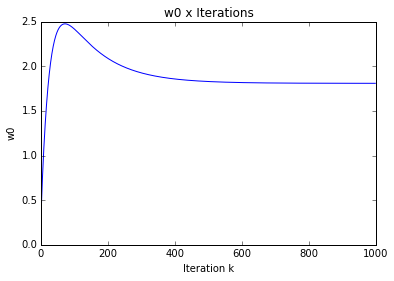

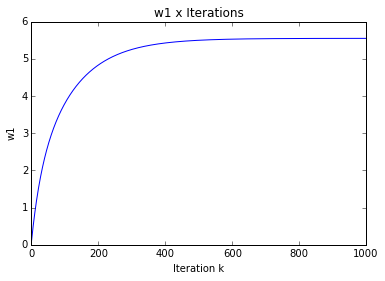

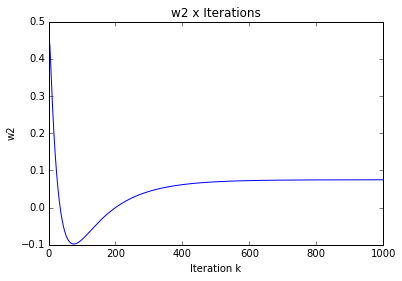

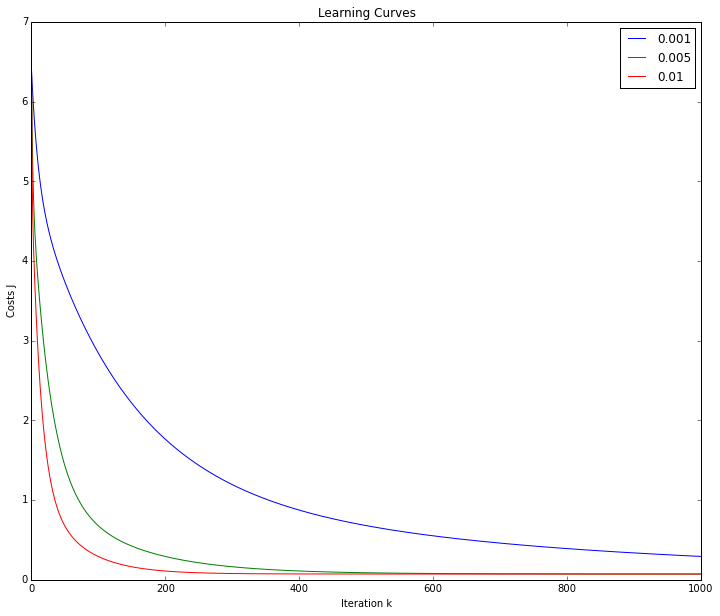

Final Weights: 
w0 = [ 1.80878973]
w1 = [ 5.54926217]
w2 = [ 0.07476063]


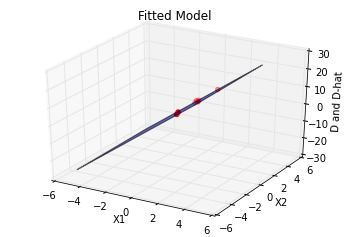

Aumentando e colocando em uma perspectiva melhor: 


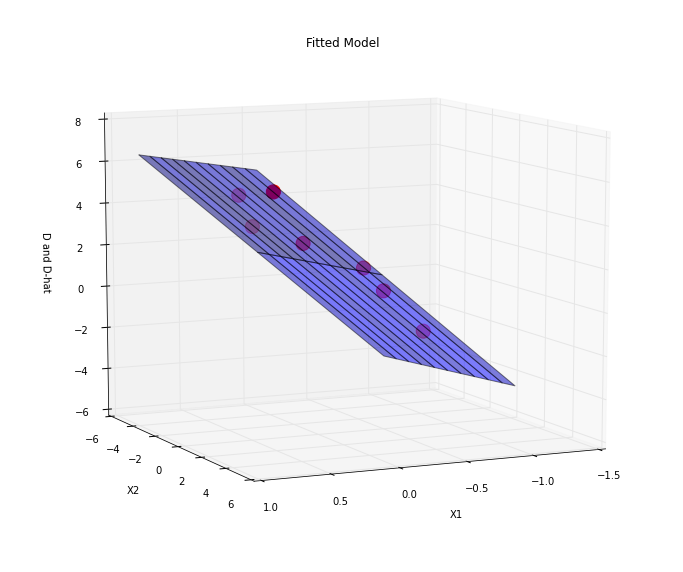

In [33]:
#We enter the data and put it on the right shape
X1 = np.array([[-0.5, -0.2, -0.1, 0.3, 0.4, 0.5, 0.7]])
X2 = np.array([[3, 3, 2.5, 2, -1, -1, 4]])
X = np.concatenate((X1, X2), axis = 0)
X = X.transpose()
y = np.array([[-1, 1, 2, 3.2, 3.5, 5, 6]])
y = y.reshape(7, 1)
#Setting the initial weights to zero
initial_weights = np.zeros((X.shape[1], 1))

#Creating the model
model = LMS_Regressor()
#Fitting the model to our data with an intercept, which is default
model = model.fit(X, y, initial_weights, [0.001, 0.005, 0.01], plots = True) 
#All the weights for the fitting
print "Final Weights: "
for i in range(len(model.weights)):
    print "w" + str(i) + " = " + str(model.weights[i]) 
plot_fitted_model_3d(X, y, model.weights[0], model.weights[1:])
print "Aumentando e colocando em uma perspectiva melhor: "
plot_fitted_model_3d2(X, y, model.weights[0], model.weights[1:])